In [ ]:
!pip install -U selenium
!pip numpy
!pip install webdriver-manager
!apt-get update
!apt-get install -y chromium-browser
!apt install chromium-chromedriver
!pip install newspaper3k

In [31]:
def create_word_cloud(string):
   maskArray = np.array(Image.open("/content/LetraD.jpg")) #uso do numpy
   cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("LetraD.jpg")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import re
from collections import Counter
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By

29
Pagina: 28
https://ufrn.br/imprensa/noticias/74955/ufrn-empossa-nova-direcao-da-eaj
https://ufrn.br/imprensa/noticias/74685/eaj-semtas-e-mpt-realizam-curso-para-catadores-de-natal
https://ufrn.br/imprensa/noticias/74216/divulgados-resultados-de-editais-para-pesquisadores-da-eaj-e-esufrn
https://ufrn.br/imprensa/noticias/74077/divulgados-resultados-preliminares-para-pesquisadores-da-eaj-e-esufrn
https://ufrn.br/imprensa/noticias/74067/aluna-da-eaj-recebe-medalha-na-olimpiada-brasileira-de-robotica
https://ufrn.br/imprensa/noticias/73408/eaj-abre-inscricoes-para-curso-sobre-praticas-de-meditacao
https://ufrn.br/imprensa/noticias/73336/propesq-lanca-edital-para-pesquisadores-da-eaj-2
https://ufrn.br/imprensa/noticias/73011/esufrn-e-eaj-ofertarao-cursos-de-formacao-pelo-programa-mulheres-mil
https://ufrn.br/imprensa/noticias/72908/eaj-promove-atividades-alusivas-ao-julho-dourado
https://ufrn.br/imprensa/noticias/71431/eaj-abre-150-vagas-para-cursos-tecnicos


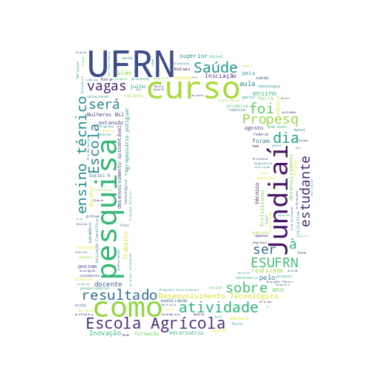

In [32]:


%matplotlib inline
from PIL import Image
from newspaper import Article
from wordcloud import WordCloud ,STOPWORDS

STOPWORDS = ['noticia','eaj','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','com','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do']

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-gpu')
driver=webdriver.Chrome(options=options)

url_1 = 'https://ufrn.br/imprensa/noticias/filtros?text=eaj';
driver.get(url_1);
time.sleep(3)
maxPagTag = driver.find_elements(By.XPATH, '//*[@id="noticias-paginacao"]/li[8]/a')[0];
maxPagStr = maxPagTag.text;
maxPag = int(maxPagStr)+1;
print(maxPag)

def find(driver):
    element = driver.find_element(By.TAG_NAME, 'content')
    if element:
        return element
    else:
        return False
aux = 0;
text_to_cloud = ''
indice = 9;
#coloquei pra
for i in range(28,maxPag):
    print('Pagina: ' + str(i))

    title_news = driver.find_elements(By.CLASS_NAME, 'blue-link');

    n_news = len(title_news)
    title_hrefs =[];

    for j in range(1,n_news):
        title_hrefs.append(title_news[j].get_attribute('href'))
    if i == 4:
        indice += 1;
    if i == 5:
        indice += 1;
    if i == 20:
        indice -= 1;

    for k in range(1,len(title_hrefs)):
        link = title_hrefs[k];
        if 'imprensa' in link:
            print(link)
            driver.get(link)
            time.sleep(10)
            news_text = WebDriverWait(driver, 100).until(find)
            text_to_cloud += news_text.text
            driver.back()
            time.sleep(2)
        if k == (len(title_hrefs) - 1):
            try:
                driver.find_element(By.XPATH, '//*[@id="noticias-paginacao"]/li['+str(indice)+']/a').click()
                time.sleep(5);
                mudou = True;
            except ex.NoSuchElementException:
                driver.refresh();
create_word_cloud(text_to_cloud)




In [ ]:

# Crie uma lista para armazenar as datas extraídas das notícias
datas = []

# Expressão regular para encontrar anos no texto
ano_regex = r'\b\d{4}\b'

# Extraia as datas das notícias usando a expressão regular
for texto in text_to_cloud:
    anos_encontrados = re.findall(ano_regex, texto)
    if anos_encontrados:
        datas.extend(anos_encontrados)

# Converta as datas para inteiros
anos = [int(ano) for ano in datas]

# Conte o número de notícias por ano usando Counter
contagem_anos = Counter(anos)

# Extraia os anos e as contagens para criar o gráfico
anos_grafico = list(contagem_anos.keys())
contagens_grafico = list(contagem_anos.values())

# Crie o gráfico de barras
plt.bar(anos_grafico, contagens_grafico, tick_label=anos_grafico)
plt.xlabel('Ano')
plt.ylabel('Número de Notícias')
plt.title('Número de Notícias por Ano')
plt.show()

# Nova seção